In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [43]:
## import dataset
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

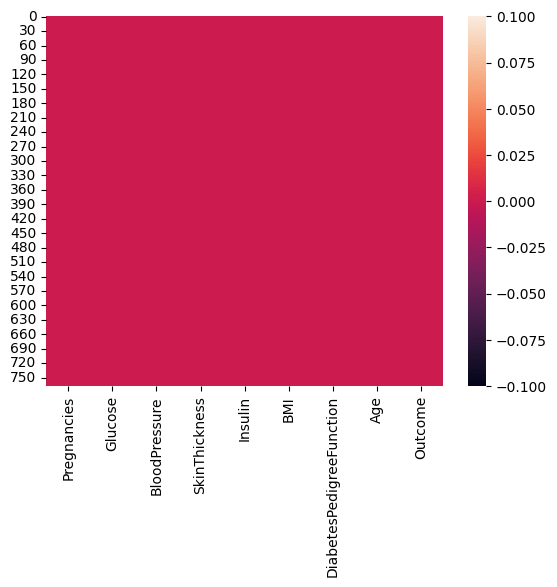

In [45]:
sns.heatmap(df.isnull())#no missing value

In [46]:
df.corr()#Weak correlation so no linear Relationship

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

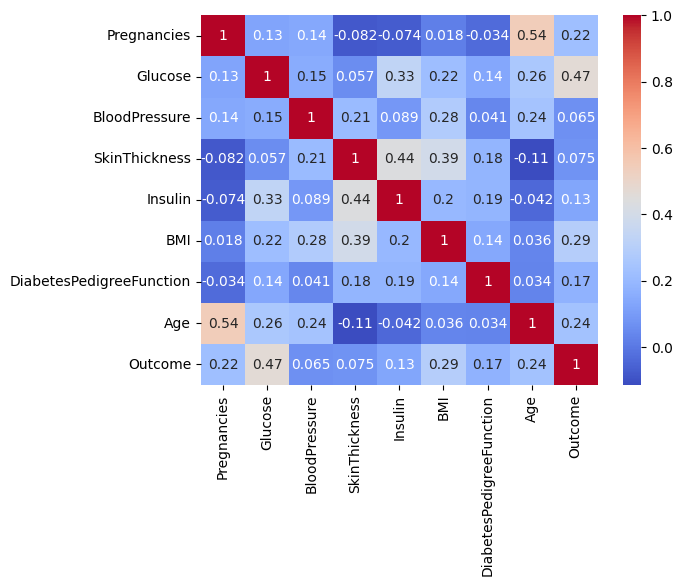

In [47]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [48]:
df.shape

(768, 9)

In [49]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

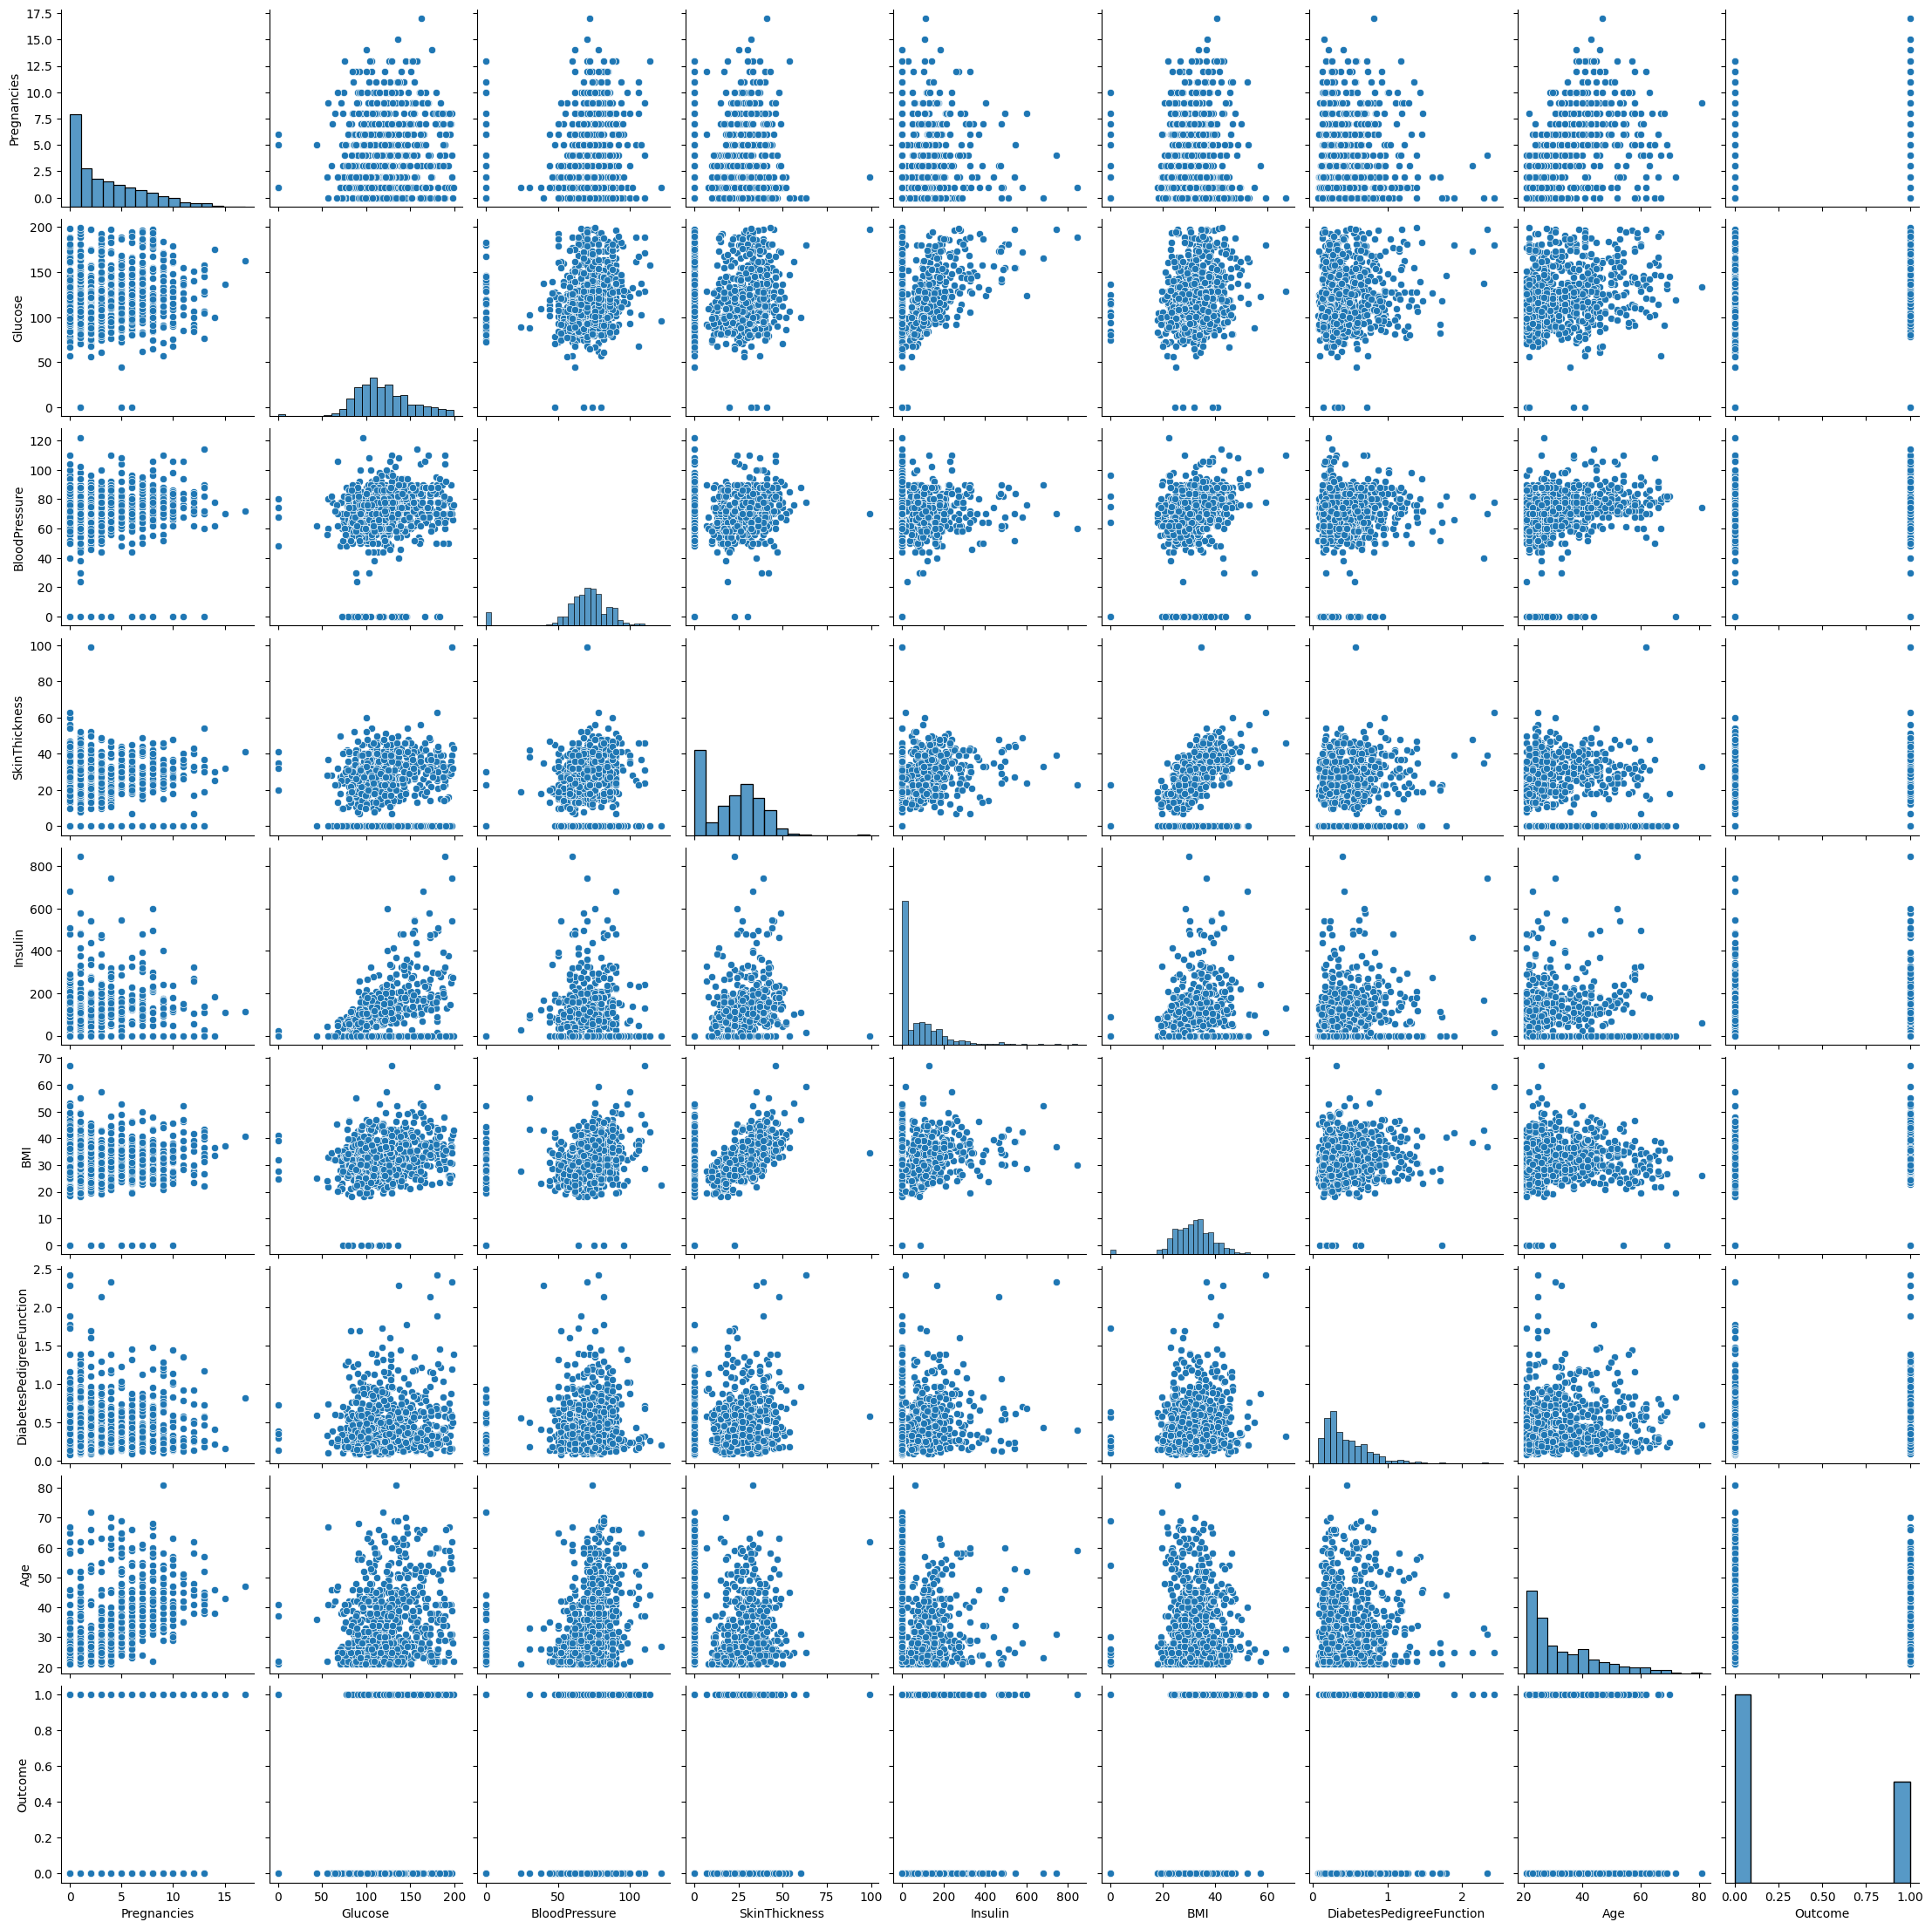

In [50]:
sns.pairplot(df) #Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

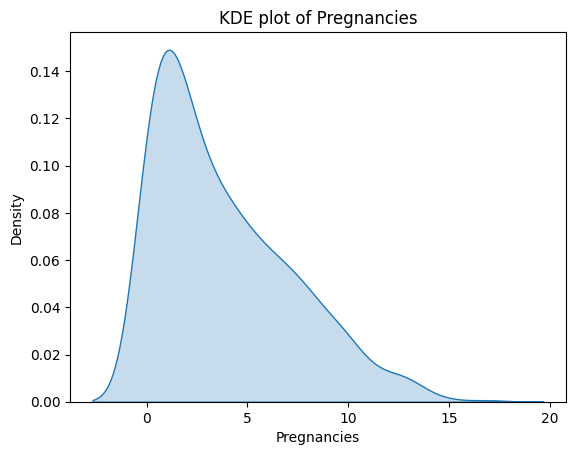

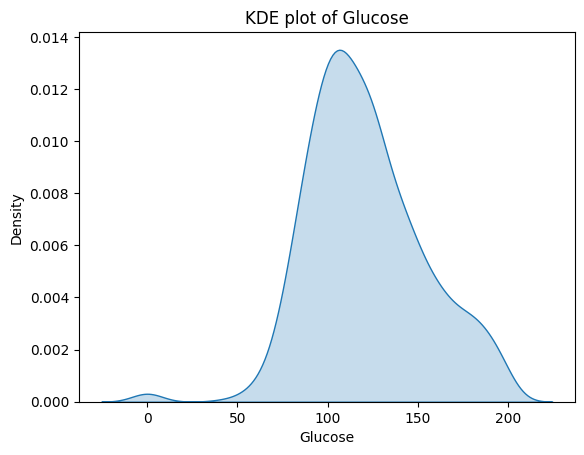

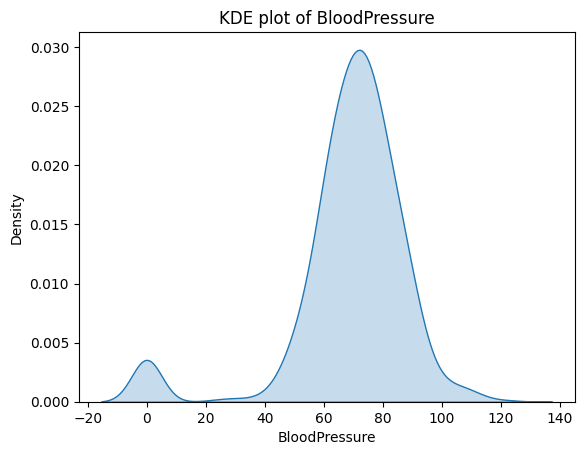

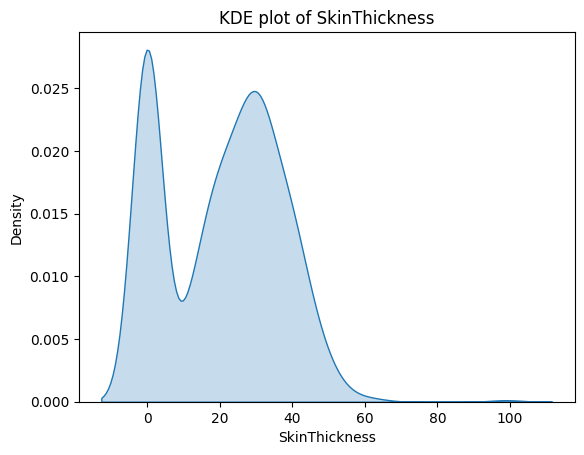

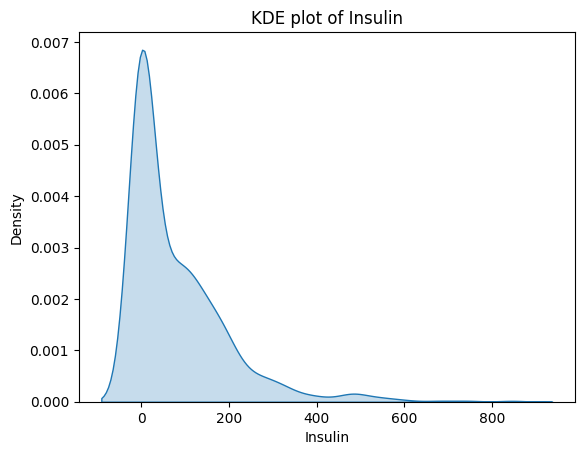

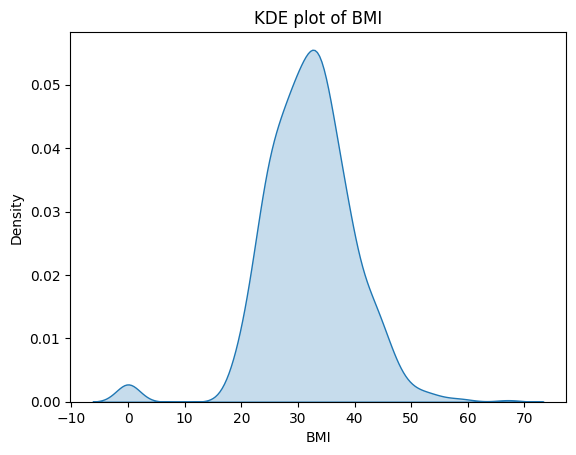

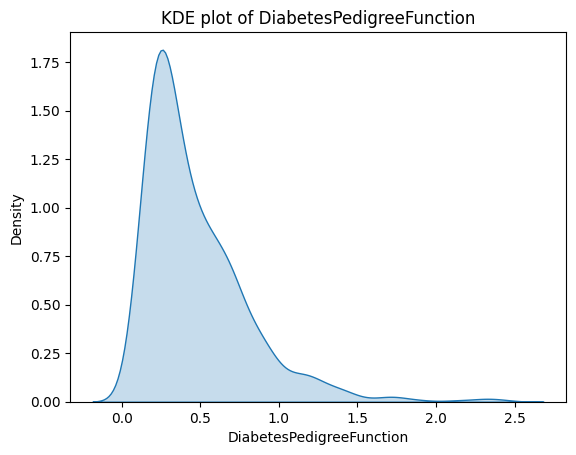

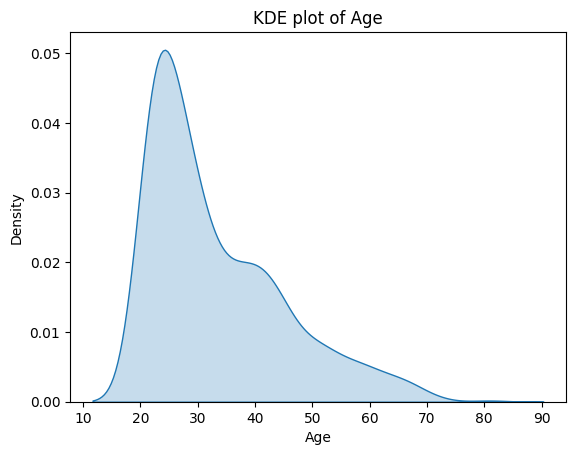

In [51]:
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram.
# KDE represents the data using a continuous probability density curve in one or more dimensions.
for i, column in enumerate(df.columns.drop('Outcome')):
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')
    plt.show()

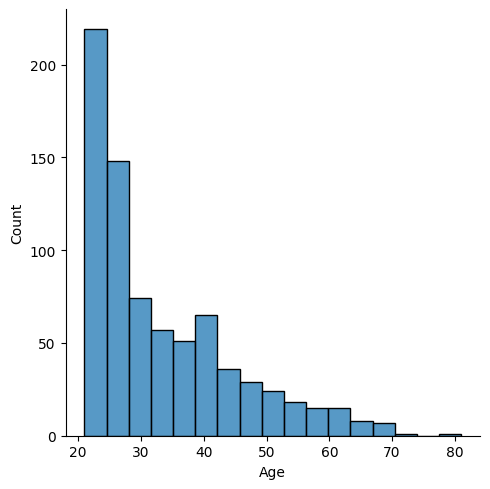

In [52]:
sns.displot(df["Age"])

<Axes: >

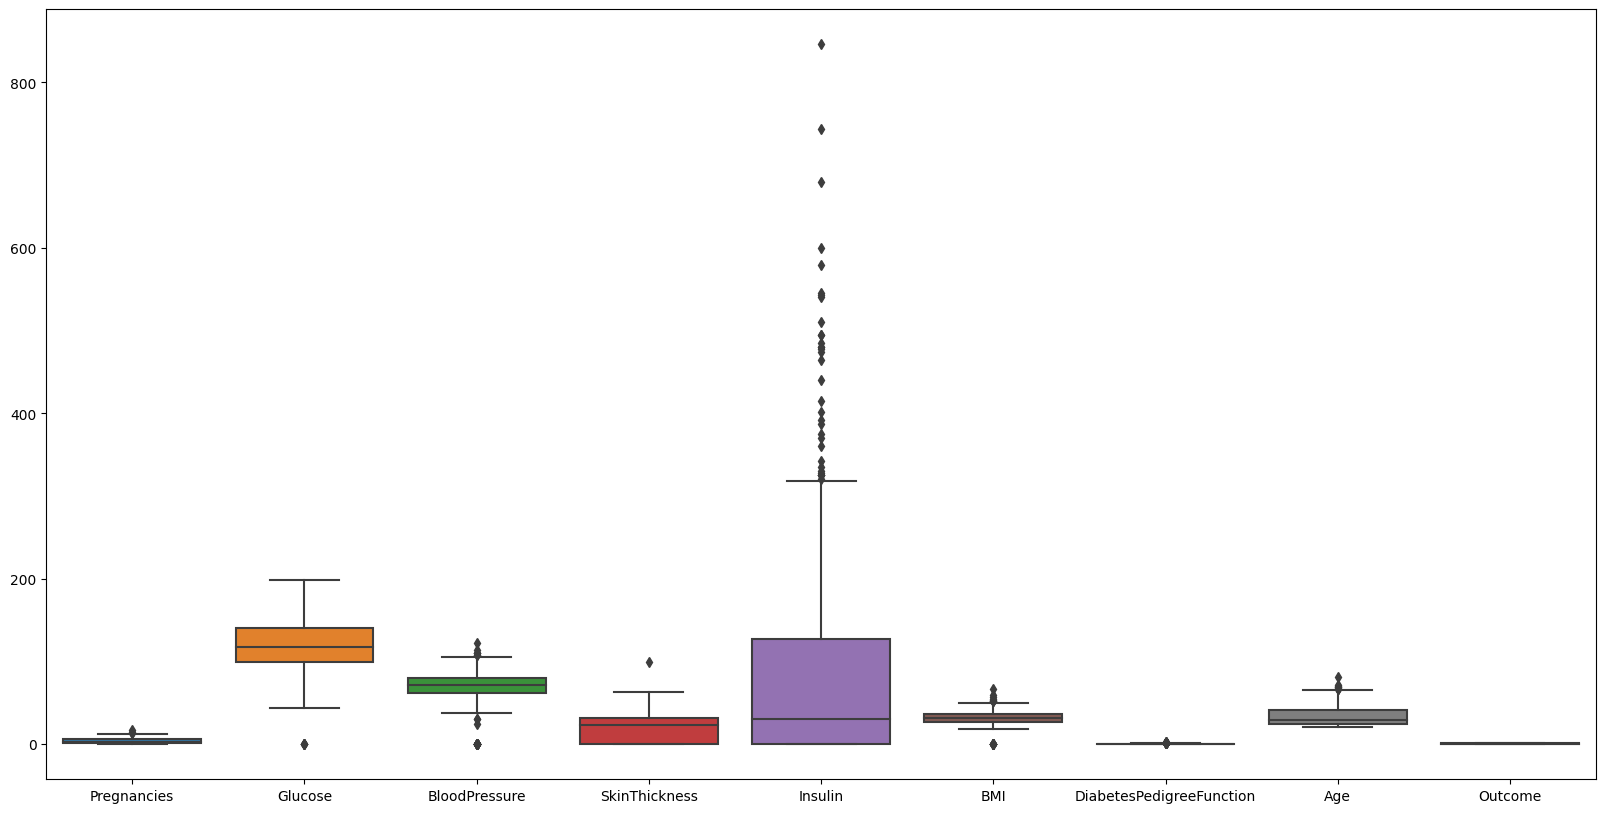

In [53]:
#to  show the outliers i use the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(df)

Axes(0.1275,0.11;0.77x0.77)


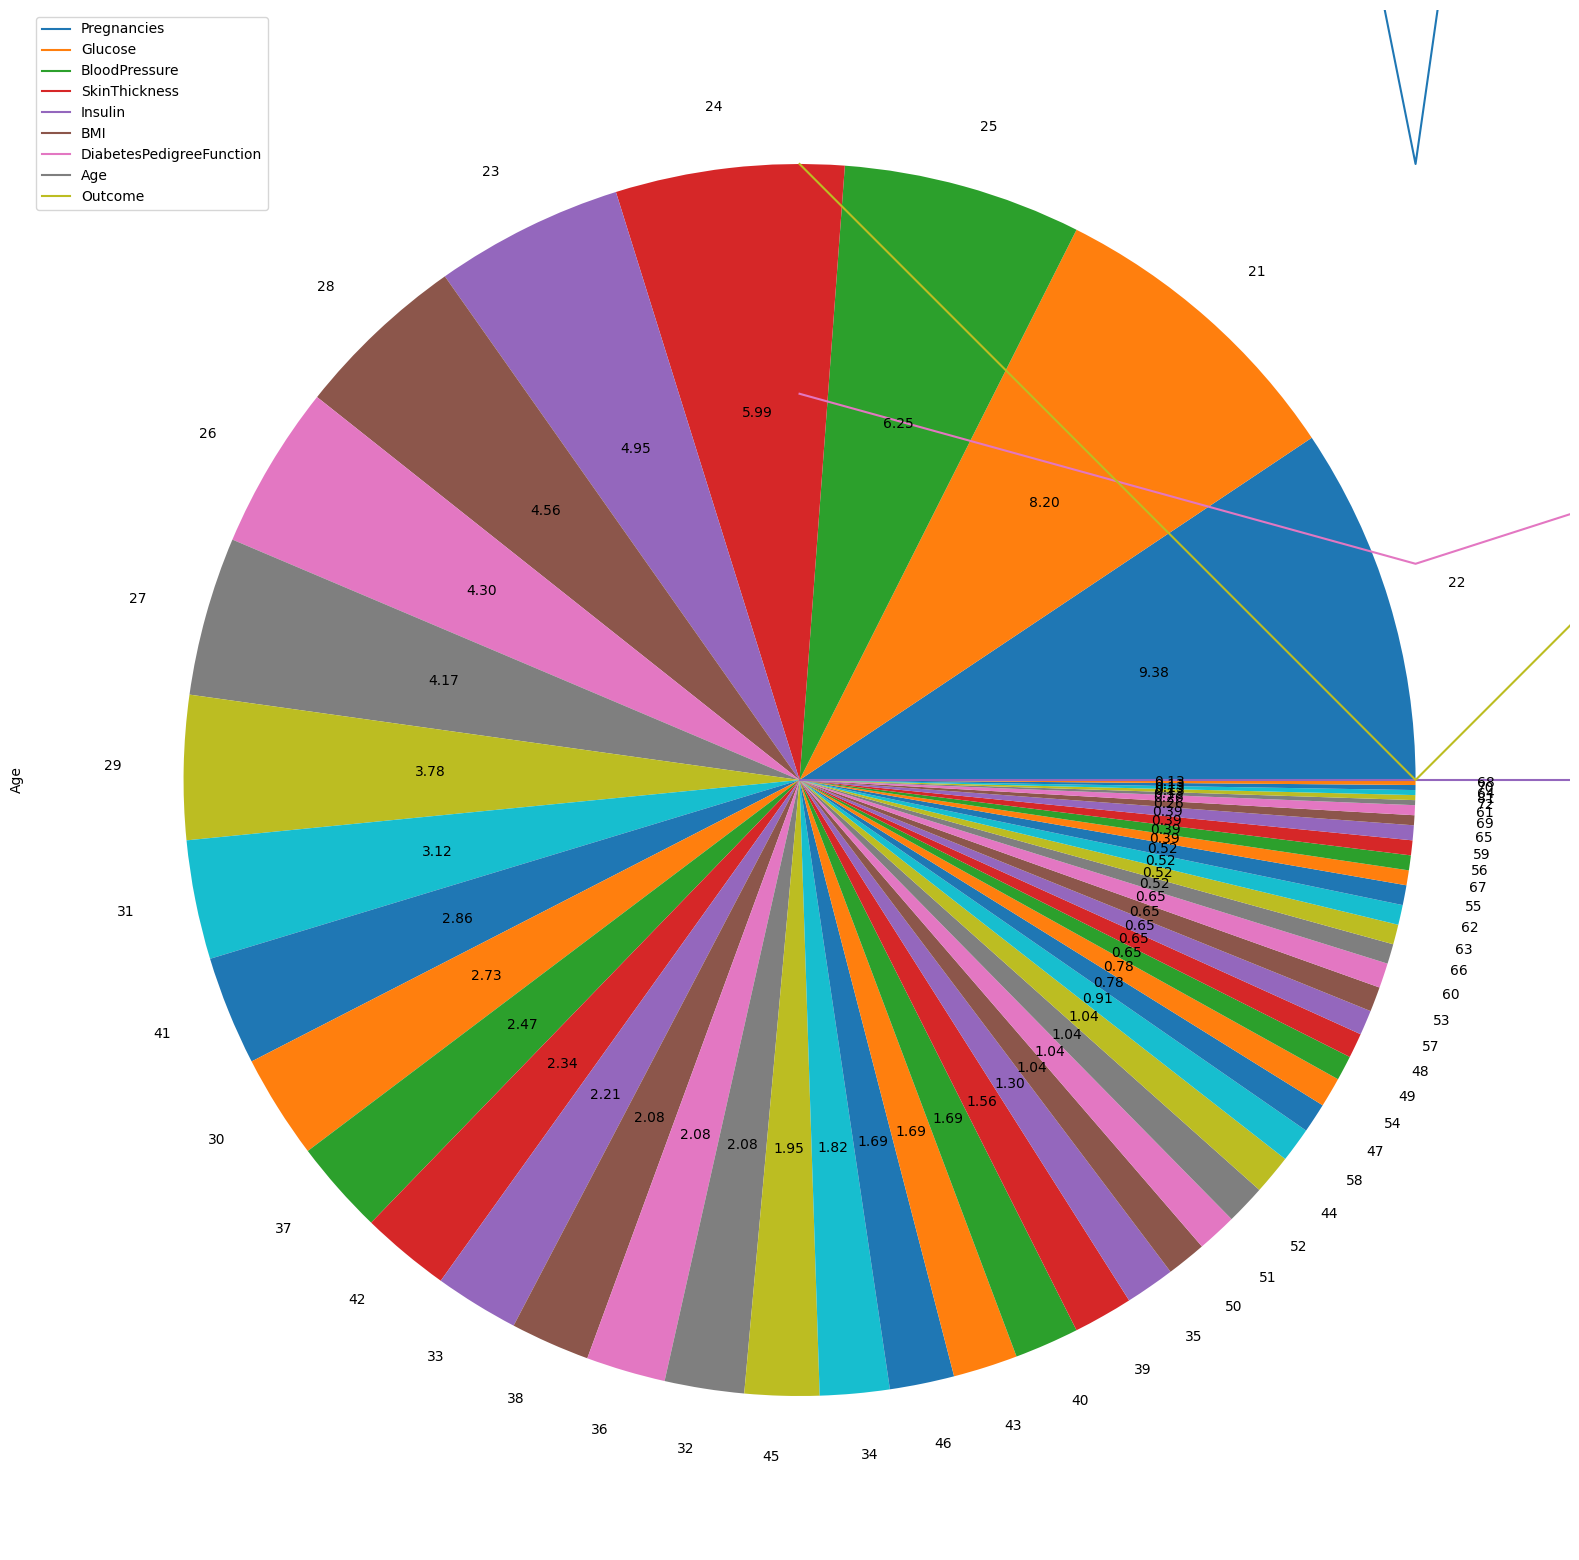

In [54]:
df.plot(figsize=(20,20))
print(df['Age'].value_counts().plot(kind='pie',autopct='%.2f'))

In [55]:
#Data spliting
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=1/3 ,random_state=0 )

In [58]:
print('Shape for training data', x_train.shape, y_train.shape)
print("_________________________________")
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (512, 8) (512,)
_________________________________
Shape for testing data (256, 8) (256,)


In [59]:
# Scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [61]:
#Build logistic Regression model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred=model.predict(X_test)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       171
           1       0.74      0.58      0.65        85

    accuracy                           0.79       256
   macro avg       0.78      0.74      0.75       256
weighted avg       0.79      0.79      0.79       256

